# Task-1 IMAGE RECOGNITION

In [66]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# import Dataset
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [4]:
#check Shape
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [58]:
y_test.shape

(10000, 1)

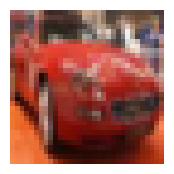

In [13]:
#Plot image
img=x_train[5];
plt.figure(figsize=(2,2))
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.show()

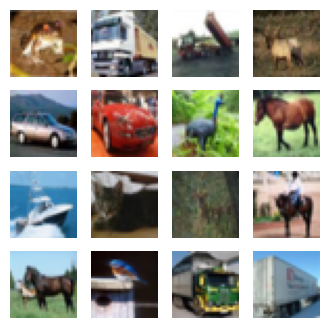

In [14]:
m=4
k=0
plt.figure(figsize=(4,4))
for i in range(0,m):
    for j in range(0,m):
        plt.subplot2grid((m,m),(i,j))
        plt.imshow(x_train[k])
        k=k+1;
        plt.axis('off')
plt.show()

In [15]:
x_train=x_train/255;
x_test=x_test/255

In [42]:
def ModelCNN():
    model=keras.Sequential([
        #input layers
        keras.layers.Input(shape=(32,32,3)),
        # Convolutional layers 1
        keras.layers.Conv2D(64,(3,3), strides=(1,1),padding='same'),
        #Convolutional Layers 2
        keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same'),
        keras.layers.MaxPooling2D(2,2),
        #Flatten layers - Output of Convolutional Layers
        keras.layers.Flatten(),
        #Hidden Layers 1
        keras.layers.Dense(256,activation='relu'),
        #Hidden layers 2
        keras.layers.Dense(128,activation='relu'),
        #Output layers
        keras.layers.Dense(10,activation='sigmoid'),
    ],
        name="CNN-CIFAR10")
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [43]:
model=ModelCNN()

In [44]:
model.summary()

Model: "CNN-CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,151,850 (8.21 MB)

 Trainable params: 2,151,850 (8.21 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
#trian the model
history=model.fit(x_train,y_train,epochs=25,shuffle=True)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 65ms/step - accuracy: 0.4326 - loss: 1.5789
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.6746 - loss: 0.9261
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.7680 - loss: 0.6588
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.8392 - loss: 0.4646
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.8942 - loss: 0.3082
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 81ms/step - accuracy: 0.9196 - loss: 0.2322
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.9402 - loss: 0.1775
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.9487 - loss: 0.1485
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.9555 - loss: 0.1337
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.9589 - loss: 0.1263
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 76ms/step - accuracy: 0.9646 - loss: 0.11

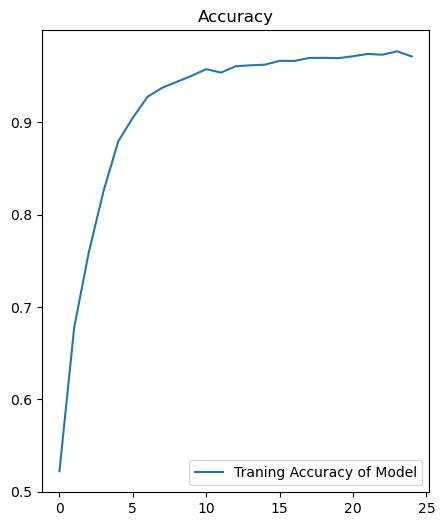

In [51]:
#plot accuracy and loss Graph
accuracy=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(5,6))
plt.plot(accuracy,label='Traning Accuracy of Model')
plt.title('Accuracy')
plt.legend()
plt.show()

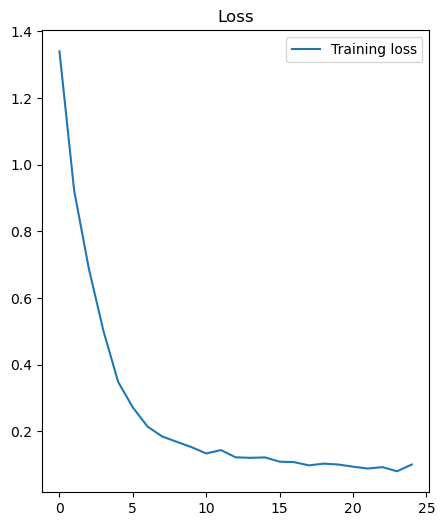

In [52]:
plt.figure(figsize=(5,6))
plt.plot(loss,label='Training loss')
plt.title('Loss')
plt.legend()
plt.show()

In [61]:
y_predi=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [54]:
predi

array([[2.8820567e-02, 4.3475917e-01, 1.8266514e-01, ..., 7.1833979e-06,
        4.1365889e-01, 9.9999368e-01],
       [1.0000000e+00, 1.0000000e+00, 2.5449153e-11, ..., 1.4336912e-15,
        1.0000000e+00, 1.0000000e+00],
       [9.8632598e-01, 9.9918145e-01, 7.4200994e-01, ..., 3.2872831e-05,
        9.9997652e-01, 7.7912641e-01],
       ...,
       [7.8389661e-05, 8.0973268e-07, 1.0000000e+00, ..., 1.1279574e-02,
        4.6783593e-02, 7.1665509e-09],
       [9.9969441e-01, 9.9999946e-01, 3.9525816e-01, ..., 7.2460163e-05,
        9.9999523e-01, 9.8292547e-01],
       [2.8573148e-05, 7.9564661e-02, 7.7219367e-01, ..., 1.0000000e+00,
        2.6246207e-09, 7.4272128e-03]], dtype=float32)

In [64]:
predicted_labels = [np.argmax(i) for i in y_predi]
cm=tf.math.confusion_matrix(y_test,predicted_labels)

In [65]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[760,  29,  58,  24,  17,  12,   8,  11,  46,  35],
       [ 61, 805,  10,  11,  12,   8,   7,   7,  25,  54],
       [101,   7, 580,  76,  88,  59,  39,  25,  16,   9],
       [ 55,  25, 139, 480,  69, 132,  48,  25,   8,  19],
       [ 57,   9, 138, 115, 539,  52,  32,  46,   7,   5],
       [ 32,   5, 244, 278,  50, 302,  35,  45,   5,   4],
       [ 20,  16, 132, 105,  80,  48, 576,   9,   4,  10],
       [ 41,   9,  95,  78, 122, 107,  14, 523,   3,   8],
       [193,  91,  30,  14,   6,  13,  13,   5, 606,  29],
       [108, 279,  14,  22,   7,  15,   4,  25,  44, 482]])>

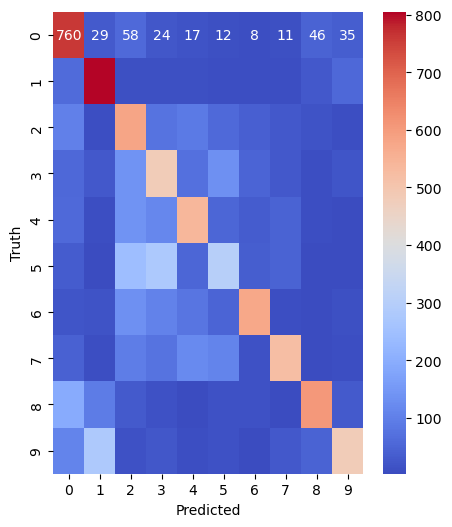

In [68]:
plt.figure(figsize=(5,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
#This is issue on my compiler that does not show remaining values

In [69]:
#SAVE THE MODEL
model.save('cifar10.keras')

In [70]:
#Load the CNN Model 
model=tf.keras.models.load_model('cifar10.keras')

In [71]:
import cv2 as cv

In [72]:
CATEGORIES=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse','ship','truck']
def image(path):
    img=cv.imread(path)
    new_arr=cv.resize(img,(32,32))
    new_arr=np.array(new_arr)
    new_arr=new_arr.reshape(1,32,32,3)
    return new_arr

In [73]:
Prediction=model.predict([image('new.jpeg')])
print(CATEGORIES[Prediction.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Automobile


In [75]:
prediction=model.predict([image('th.jpeg')])
print(CATEGORIES[prediction.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Airplane


In [78]:
prediction=model.predict([image('cute.jpg')])
print(CATEGORIES[prediction.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Bird


In [79]:
prediction=model.predict([image('truck.WEBP')])
print(CATEGORIES[prediction.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Airplane
